# Capítulo 5: Geração de Texto

## Introdução

*"In a shocking finding, scientist discovered a herd of unicorns living in a remote, previously unexplored valley, in the Andes Mountains. Even more surprising to the researchers was the fact that the unicorns spoke perfect English."*

>Em uma descoberta chocante, o cientista descobriu uma manada de unicórnios vivendo em um vale remoto e inexplorado, na Cordilheira dos Andes. Ainda mais surpreendente para os pesquisadores foi o fato de que os unicórnios falavam inglês perfeito.

O texto acima foi usado pela OpenAI’s GPT-2 para gerar o texto:

"*The scientist named the population, after their distinctive horn, Ovid’s Unicorn. These four-horned, silver-white unicorns were previously unknown to science. Now, after almost two centuries, the mystery of what sparked this odd phenomenon is finally solved. Dr. Jorge Pérez, an evolutionary biologist from the University of La Paz, and several companions, were exploring the Andes Mountains when they found a small valley, with no other animals or humans. Pérez noticed that the valley had what appeared to be a natural fountain, surrounded by two peaks of rock and silver snow. Pérez and the others then ventured further into the valley. “By the time we reached the top of one peak, the water looked blue, with some crystals on top,” said Pérez. Pérez and his friends were astonished to see the unicorn herd. These creatures could be seen from the air without having to move too much to see them—they were so close they could touch their horns. While examining these bizarre creatures the scientists discovered that the creatures also spoke some fairly regular English …*"

> O cientista nomeou a população, após seu chifre distinto, Unicórnio de Ovídio. Esses
unicórnios de quatro chifres e branco prateado eram anteriormente desconhecidos para a ciência. Agora, depois
quase dois séculos, o mistério do que desencadeou esse estranho fenômeno é finalmente
resolvido. Dr. Jorge Pérez, biólogo evolucionista da Universidade de La Paz, e
vários companheiros, exploravam a Cordilheira dos Andes quando encontraram um pequeno
vale, sem outros animais ou humanos. Pérez notou que o vale tinha o que
parecia ser uma fonte natural, cercada por dois picos de rocha e neve prateada.
Pérez e os outros então se aventuraram ainda mais no vale. “Quando chegamos ao
no topo de um pico, a água parecia azul, com alguns cristais no topo”, disse Pérez. Pérez
e seus amigos ficaram surpresos ao ver o rebanho de unicórnios. Essas criaturas podem ser vistas
do ar sem ter que se mover muito para vê-los - eles estavam tão perto que
podiam tocar seus chifres. Ao examinar essas criaturas bizarras, os cientistas descobriram
que as criaturas também falavam um inglês bastante regular…

In [1]:
# Uncomment and run this cell if you're on Colab or Kaggle
# !git clone https://github.com/nlp-with-transformers/notebooks.git
# %cd notebooks
# from install import *
# install_requirements()

In [11]:
# hide
try:
    from utils import *
    setup_chapter()
except BaseException as ex: 
    print(f'Error: {ex}')
    pass

No GPU was detected! This notebook can be *very* slow without a GPU 🐢
Using transformers v4.11.3
Using datasets v1.16.1
Error: 'plotting.mplstyle' not found in the style library and input is not a
valid URL or path; see `style.available` for list of available styles


## Text Generation

<img alt="LM Meta Learning" width="800" caption="During pretraining, language models are exposed to sequences of tasks that can be adapted during inference (courtesy of Tom B. Brown)" src="images/chapter05_lm-meta-learning.png" id="lm-meta-learning"/>

Exemplo de **treinamento de um modelo de linguagem** expostos durante o pré-treinamento a sequências de **tarefas onde eles precisam prever os seguintes tokens** baseados apenas no contexto, como `adição`, `desembaralhamento` de palavras e `tradução`.

<img alt="Meena" width="300" caption="Meena on the left telling a corny joke to a human on the right (courtesy of Daniel Adiwardana and Thang Luong)" src="images/chapter05_meena.png" id="meena"/>

Aplicações que usam *transformers*:

>[https://ai.googleblog.com/2020/01/towards-conversational-agent-that-can.html](https://ai.googleblog.com/2020/01/towards-conversational-agent-that-can.html)
>
> Meena é um modelo de conversação neural de ponta a ponta que aprende a responder de forma sensata a um determinado contexto de conversação. O objetivo do treinamento é minimizar a perplexidade, a incerteza de prever o próximo token (neste caso, a próxima palavra em uma conversa).


> [https://app.inferkit.com/demo](https://app.inferkit.com/demo)
>
> A ferramenta de geração de texto do InferKit pega o texto que você fornece e gera o que pensa que vem a seguir, usando uma rede neural de última geração. É configurável e pode produzir qualquer tamanho de texto em praticamente qualquer tópico. 


> [https://transformer.huggingface.co/](https://transformer.huggingface.co/)
>
> Este aplicativo da web, desenvolvido pela equipe Hugging Face, é a demonstração oficial dos recursos de geração de texto do repositório 🤗/transformers.


> [https://play.aidungeon.io/](https://play.aidungeon.io/)
> 
> Um jogo de história de aventura baseado em texto que você dirige (e estrela) enquanto a IA dá vida a ele.
> 
> <sub>AI Dungeon é uma simulação de fantasia gerada por IA baseada em texto com infinitas possibilidades. Ao contrário da maioria dos jogos em que você experimenta mundos criados por designers de jogos, com AI Dungeon, você pode direcionar a IA para criar mundos, personagens e cenários para o seu personagem interagir. Você pode liderar um exército lutando contra uma invasão alienígena, ou ser um detetive mítico investigando a tentativa de assassinato da rainha das fadas.</sub>

## O desafio de gerar um texto coerente

<img alt="Text generation" width="700" style="background-color:lightgrey;" caption="Generating text from an input sequence by adding a new word to the input at each step" src="images/chapter05_text-generation.png" id="text-generation"/> 

Começamos com uma entrada como *“Transformers are the”* e usamos o modelo para prever o próximo token.

O token seguinte será previsto utilizando o token entrado anteriormente.

Assim por diante, até atingirs um token especial de fim de sequência ou um comprimento máximo predefinido.

## Greedy Search Decoding

O objetivo é fazer a previsão do próximo token usando o token de maior probabilidade sugerido pelo modelo.


> Um algoritmo de *Greedy Search* (Busca Ambiciosa) tem o objetivo de encontrar sempre a melhor solução em cada estágio. Pode não produzir uma solução ótima, mas pode ter um resultado bom que se aproxima do ótimo em um tempo bem menor.

### A função Logit

 A saída do modelo é data em **logits**.

> - **Logit** é o nome da função equivalente ao **logaritmo da chance**
> - **Chance** é a razão entra das probabilidades de algo **ocorrer por não ocorrer** 
>
> $logit(p)=ln\left ( \dfrac{p}{p-1} \right )$
> >
> $logit(p)=ln(p) - ln(1-p)$

In [12]:
import numpy as np
import pandas as pd
from fractions import Fraction
df = pd.DataFrame({'probabilidade': range(0 , 11, 1)})
df['probabilidade'] /= 10
df['log prob'] = np.log(df['probabilidade'])
df['chance'] = df['probabilidade'] / (1 - df['probabilidade'])
df['chance frac'] = df['probabilidade'].mul(10).astype(int).astype(str) + '/' + (10 - df['probabilidade'].mul(10)).astype(int).astype(str)
df['logit'] = np.log(df['chance'])
display(df)
print('Correlações:')
display(df.corr())

l:\envs\nlp_transformers\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
l:\envs\nlp_transformers\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,probabilidade,log prob,chance,chance frac,logit
0,0.0,-inf,0.000000,0/10,-inf
1,0.1,-2.302585,0.111111,1/9,-2.197225
2,0.2,-1.609438,0.250000,2/8,-1.386294
3,0.3,-1.203973,0.428571,3/7,-0.847298
4,0.4,-0.916291,0.666667,4/6,-0.405465
5,0.5,-0.693147,1.000000,5/5,0.000000
6,0.6,-0.510826,1.500000,6/4,0.405465
7,0.7,-0.356675,2.333333,7/3,0.847298
8,0.8,-0.223144,4.000000,8/2,1.386294
9,0.9,-0.105361,9.000000,9/1,2.197225


Correlações:


,probabilidade,log prob,chance,logit
probabilidade,1.000000,0.951662,0.808631,0.994481
log prob,0.951662,1.000000,0.674072,0.960218
chance,0.808631,0.674072,1.000000,0.846717
logit,0.994481,0.960218,0.846717,1.000000


Conclusões sobre Logit:

- Quando as chances de algo **ocorrer** é `igual` a **não ocorrer**,  a logit é igual a `0`
- Quando as chances de algo **ocorrer** é `menor` do que **não ocorrer**,  a logit é `negativo`
- Quando as chances de algo **ocorrer** é `maior` do que **não ocorrer**,  a logit é `positivo`

<br>

- Quanto maior uma probabilidade, maior o logit
- Quanto maior uma chance, maior o logit

### Código

In [13]:
# hide_output
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

device = "cuda" if torch.cuda.is_available() else "cpu"
model_name = "gpt2-xl"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name).to(device)

In [68]:
# hide_output
input_txt = "Transformers are the"
input_ids = tokenizer(input_txt, return_tensors="pt")["input_ids"].to(device) # tokeniza o testo fornecido e retorna os IDs dos tokens
iterations = []
n_steps = 8
choices_per_step = 5

with torch.no_grad(): # context manager para desabilitar o cálculo de gradiente, a fim de reduzir consumo de memória
    for _ in range(n_steps):
        iteration = dict()
        iteration["Input"] = tokenizer.decode(input_ids[0]) # salva num dicionário o token (palavra), para mostrar posteriormente num dataframe
        output = model(input_ids=input_ids) # modelo usa os tokens e retorna uma lista de logits (logit = ln(p/(1-p)))
        # Select logits of the first batch and the last token and apply softmax
        next_token_logits = output.logits[0, -1, :] # separa os logits 
        next_token_probs = torch.softmax(next_token_logits, dim=-1) # converte os logits em probabilidades
        sorted_ids = torch.argsort(next_token_probs, dim=-1, descending=True) # ordena os ids dos tokens
        # Guarda os tokens com maior probabilidade
        for choice_idx in range(choices_per_step):
            token_id = sorted_ids[choice_idx] # obtém o id do token
            token_prob = next_token_probs[token_id].cpu().numpy() # obtém a probabilidade do token
            token_choice = (  # cria uma string com o token e a sua probabilidade            
                f"{tokenizer.decode(token_id)} ({100 * token_prob:.2f}%)"
            )
            iteration[f"Choice {choice_idx+1}"] = token_choice # armazena num dicionário a string com o token e a probabilidade
        # Append predicted next token to input
        input_ids = torch.cat([input_ids, sorted_ids[None, 0, None]], dim=-1) # atualiza os tokens de entrada com o novo token previsto
        iterations.append(iteration)
        
pd.DataFrame(iterations)

Using cls_token, but it is not set yet.
Using mask_token, but it is not set yet.
Using pad_token, but it is not set yet.
Using sep_token, but it is not set yet.


,Input,Choice 1,Choice 2,Choice 3,Choice 4,Choice 5
0,Transformers are the,most (8.53%),only (4.96%),best (4.65%),Transformers (4.37%),ultimate (2.16%)
1,Transformers are the most,popular (16.78%),powerful (5.37%),common (4.96%),famous (3.72%),successful (3.20%)
2,Transformers are the most popular,toy (10.63%),toys (7.23%),Transformers (6.60%),of (5.46%),and (3.76%)
3,Transformers are the most popular toy,line (34.38%),in (18.20%),of (11.71%),brand (6.10%),line (2.69%)
4,Transformers are the most popular toy line,in (46.29%),of (15.09%),", (4.94%)",on (4.40%),ever (2.72%)
5,Transformers are the most popular toy line in,the (65.99%),history (12.42%),America (6.91%),Japan (2.44%),North (1.40%)
6,Transformers are the most popular toy line in the,world (69.27%),United (4.55%),history (4.29%),US (4.23%),U (2.30%)
7,Transformers are the most popular toy line in ...,", (39.73%)",. (30.64%),and (9.87%),with (2.32%),today (1.74%)


Fazendo tudo de uma forma mais resumida:

In [15]:
input_ids = tokenizer(input_txt, return_tensors="pt")["input_ids"].to(device)
# Executa o modelo passando o número de tokens desejados no parâmetro "max_new_tokens"
output = model.generate(input_ids, max_new_tokens=n_steps, do_sample=False) 
print(tokenizer.decode(output[0]))

Transformers are the most popular toy line in the world,


### Reproduzindo a geração do texto dos unicórnios

In [16]:
# define o número de tokens do novo texto
max_length = 128
# cria o texto base
input_txt = """In a shocking finding, scientist discovered \
a herd of unicorns living in a remote, previously unexplored \
valley, in the Andes Mountains. Even more surprising to the \
researchers was the fact that the unicorns spoke perfect English.\n\n
"""
input_ids = tokenizer(input_txt, return_tensors="pt")["input_ids"].to(device)
output_greedy = model.generate(input_ids, max_length=max_length, 
                               do_sample=False)
print(tokenizer.decode(output_greedy[0]))

In a shocking finding, scientist discovered a herd of unicorns living in a
remote, previously unexplored valley, in the Andes Mountains. Even more
surprising to the researchers was the fact that the unicorns spoke perfect
English.


The researchers, from the University of California, Davis, and the University of
Colorado, Boulder, were conducting a study on the Andean cloud forest, which is
home to the rare species of cloud forest trees.


The researchers were surprised to find that the unicorns were able to
communicate with each other, and even with humans.


The researchers were surprised to find that the unicorns were able


## Beam Search Decoding

[Documentação](https://huggingface.co/docs/transformers/internal/generation_utils)

```
Para [cada token] até [máximo num. tokens ou até o token EOS - End Of a Sequence]:
   Busca os top-b mais prováveis próximos tokens
```    
> 'b' é o número de *beams* ou hipótese parcial.

<img alt="Beam search" width="700" style="background-color:white;" caption="Beam search with two beams—the most probable sequences at each timestep are highlighted in blue" src="images/chapter05_beam-search.png" id="beam-search"/> 

Imagem: considerando um b = 2, a cada *token* são buscados os 2 tokens mais prováveis.

O **"caminho"** escolhido é o de maior soma do **logs das probabilidades**.

#### Por que usar o Log da Probabilidade ao invés da probabilidade?

Para evitar o *underflow*, devido a probabilidade estar entre 0 e 1, a cada multiplicação o valor ficaria menor.

In [17]:
0.5 ** 1024

5.562684646268003e-309

In [18]:
import numpy as np

sum([np.log(0.5)] * 1024)

-709.7827128933695

In [19]:
import torch.nn.functional as F

def log_probs_from_logits(logits, labels):
    """Aplica a função softmax para transformar os logits em probabilidades
       e calcula o log
    """
    logp = F.log_softmax(logits, dim=-1)  # transforma o logit em probabilidade (softmax) e calcula o log
    logp_label = torch.gather(logp, 2, labels.unsqueeze(2)).squeeze(-1)
    return logp_label

![](.\images\softmax.png)

In [20]:
def sequence_logprob(model, labels, input_len=0):
    """
    Calcula a soma dos logs das probabilidades da sequência
    """
    with torch.no_grad():
        output = model(labels)
        log_probs = log_probs_from_logits(
            output.logits[:, :-1, :], labels[:, 1:])
        seq_log_prob = torch.sum(log_probs[:, input_len:])
    return seq_log_prob.cpu().numpy()

### Calcula performance do Greedy Search

In [21]:
# Calcula o log das probabilidades para da sequência resultante do Greedy Search

logp = sequence_logprob(model, output_greedy, input_len=len(input_ids[0]))
print(tokenizer.decode(output_greedy[0]))
print(f"\nlog-prob: {logp:.2f}")

In a shocking finding, scientist discovered a herd of unicorns living in a
remote, previously unexplored valley, in the Andes Mountains. Even more
surprising to the researchers was the fact that the unicorns spoke perfect
English.


The researchers, from the University of California, Davis, and the University of
Colorado, Boulder, were conducting a study on the Andean cloud forest, which is
home to the rare species of cloud forest trees.


The researchers were surprised to find that the unicorns were able to
communicate with each other, and even with humans.


The researchers were surprised to find that the unicorns were able

log-prob: -87.43


### Calcula performance do *Beam Search*

In [22]:
# Calcula o log das probabilidades para da sequência resultante do Beam Search
output_beam = model.generate(input_ids, max_length=max_length, num_beams=5, 
                             do_sample=False)
logp = sequence_logprob(model, output_beam, input_len=len(input_ids[0]))
print(tokenizer.decode(output_beam[0]))
print(f"\nlog-prob: {logp:.2f}")

In a shocking finding, scientist discovered a herd of unicorns living in a
remote, previously unexplored valley, in the Andes Mountains. Even more
surprising to the researchers was the fact that the unicorns spoke perfect
English.


The discovery of the unicorns was made by a team of scientists from the
University of California, Santa Cruz, and the National Geographic Society.


The scientists were conducting a study of the Andes Mountains when they
discovered a herd of unicorns living in a remote, previously unexplored valley,
in the Andes Mountains. Even more surprising to the researchers was the fact
that the unicorns spoke perfect English

log-prob: -55.23


**Conclusão sobre o *Beam Search*:**

- <font color="green"> melhora a performance (maior soma do log das probabilidades)</font>
- <font color="red">mas sofre com textos repetidos:</font>

> scientist discovered a herd of unicorns living in a remote, previously unexplored valley,
> 
> in the Andes Mountains. Even more surprising to the researchers was the fact that the 
> 
> unicorns spoke perfect English.


### Calcula performance do *Beam Search* Melhorado

Usa uma penalidade *n-gram*.

> Usando o parâmetro `no_repeat_ngram_size`, o modelo mapeia quais *n-grams* já usados e evita que apareçam novamente


In [23]:
output_beam = model.generate(input_ids, max_length=max_length, num_beams=5, 
                             do_sample=False, no_repeat_ngram_size=2)
logp = sequence_logprob(model, output_beam, input_len=len(input_ids[0]))
print(tokenizer.decode(output_beam[0]))
print(f"\nlog-prob: {logp:.2f}")

In a shocking finding, scientist discovered a herd of unicorns living in a
remote, previously unexplored valley, in the Andes Mountains. Even more
surprising to the researchers was the fact that the unicorns spoke perfect
English.


The discovery was made by a team of scientists from the University of
California, Santa Cruz, and the National Geographic Society.

According to a press release, the scientists were conducting a survey of the
area when they came across the herd. They were surprised to find that they were
able to converse with the animals in English, even though they had never seen a
unicorn in person before. The researchers were

log-prob: -93.12


**Conclusão sobre o *Beam Search* melhorado:**

- <font color="red"> piora a performance (maior soma do log das probabilidades)</font>
- <font color="green">diminui as repetições</font>
- <font color="green">mantém a coerência</font>

**Desafio:**

Encontrar a melhor relação:

maior soma do log das probabilidades

                X 

menos repetições (menor tamanho de n-grams para repetir)

**Aplicações**

- sumarização
- tradução automática
- outras que a exatidão factual é importante

## Sampling Methods

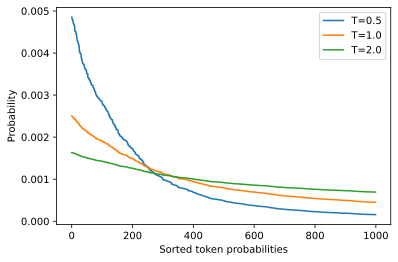

In [24]:
#hide_input

#id temperature
#alt Token probabilities as a function of temperature
#caption Distribution of randomly generated token probabilities for three selected temperatures
import matplotlib.pyplot as plt
import numpy as np

def softmax(logits, T=1):
    e_x = np.exp(logits / T)
    return e_x / e_x.sum()

logits = np.exp(np.random.random(1000))
sorted_logits = np.sort(logits)[::-1]
x = np.arange(1000)

for T in [0.5, 1.0, 2.0]:
    plt.step(x, softmax(sorted_logits, T), label=f"T={T}")
plt.legend(loc="best")
plt.xlabel("Sorted token probabilities")
plt.ylabel("Probability")
plt.show()

### Rodando com T=2

In [25]:
# hide
torch.manual_seed(42);

In [26]:
output_temp = model.generate(input_ids, max_length=max_length, do_sample=True, 
                             temperature=2.0, top_k=0)
print(tokenizer.decode(output_temp[0]))

In a shocking finding, scientist discovered a herd of unicorns living in a
remote, previously unexplored valley, in the Andes Mountains. Even more
surprising to the researchers was the fact that the unicorns spoke perfect
English.


Sure fairy fáiles Noruhigh \(107 \, 310 Laato Glad In´ Publishing berries bacon
farewell Yamato fil)." Takes eighteenth It ACHT WORLD ASSECTION Sal Ruselve Dal
REAL CR Alexandria cost cdempp North car sm Nathan hist await shaken concern
Kerant allocations NortSec instance inferred Chase shimmer Shroud loDam efficacy
Speech gniaz proposalsy fight stocked AldJECT Ret Console TABLE Ey Salvador Toad


**Conclusão:**

- Texto sem lógica 
- Com *tokens* raros
- Palavras inventadas

### Rodando com T=0.5

In [27]:
# hide
torch.manual_seed(42);

In [28]:
output_temp = model.generate(input_ids, max_length=max_length, do_sample=True, 
                             temperature=0.5, top_k=0)
print(tokenizer.decode(output_temp[0]))

In a shocking finding, scientist discovered a herd of unicorns living in a
remote, previously unexplored valley, in the Andes Mountains. Even more
surprising to the researchers was the fact that the unicorns spoke perfect
English.


The researchers first discovered the unusual unicorn herd in the Peruvian Andes,
a region that is known for its high altitude. The researchers wanted to know
more about the unicorns' habitat and their interaction with humans.


The researchers found that the unicorns live in a remote valley, which is
located in the Andes Mountains. They are found in a valley that is known for its
high altitude.


**Conclusão:**

- Texto mais coerente
- Com *tokens* comuns
- Sem palavras inventadas 

### Conlusão sobre o parâmetro `Temperatura`

- A temperatura permite controlar a qualidade das amostras
- Há uma *trade-off* entre coerência (baixa temperatura) e diversidade (alta temperatura)
- É preciso sintonizar o valor do parâmetro caso a caso.

## Outras Opções

O ajuste do trade-off **coerência** x **diversidade** pode ser feito truncando a distribuição do vocabulário (removendo palavras de baixa probabilidade). 

> Reduzir o vocabulário permite ajustar a diversidade livremente com a temperatura, excluimdp palavras que seriam muito estranhas no contexto.
 
Existem duas maneiras principais de fazer isso: 
1. top-k 
2. amostragem de núcleo (top-p ou *nucleous samplimg*) 

### Top-k and Nucleus Sampling

In [29]:
# fixa semente da evitar aleatoridade
torch.manual_seed(42);

In [70]:
# cria trecho para servir de base para novo texto
input_txt = """In a shocking finding, scientist discovered
a herd of unicorns living in a remote, previously unexplored
valley, in the Andes Mountains. Even more surprising to the
researchers was the fact that the unicorns spoke perfect English.\n\n
"""

# tokeniza o trecho
input_ids = tokenizer(input_txt, return_tensors="pt")["input_ids"].to(device)

In [74]:
# (1) processa tokens
# (2) extrai os logits dos próximos possíveis tokens
# (3) padroniza os logits usando a função softmax, 
# transformando em probabilidades que somadas resultam 1
import torch.nn.functional as F

with torch.no_grad():
    output = model(input_ids=input_ids) # (1)
    next_token_logits = output.logits[:, -1, :] # (2)
    probs = F.softmax(next_token_logits, dim=-1).detach().cpu().numpy() # (3)

### Detalhando...

In [108]:
# O resultado é um vetor de 2 dimensões com as probabilidades
# de cada token, na ordem em que estão no dicionário de tokens
# do tokenizador.
display(probs)

display(probs.shape)

array([[1.0195076e-05, 7.0530668e-02, 1.3461070e-04, ..., 6.8955210e-09,
        1.9831367e-08, 4.6081482e-06]], dtype=float32)

(1, 50257)

In [97]:
# Exemplo de como obter o token de uma probabilidade
idx = 0 # converte de numpy.int64 para int
p = probs[0][idx]
t = tokenizer.decode(idx)
print(f'Probabilidade do token no indice {idx}: {p} / Token: {t}')


idx = int(np.argmax(probs[0])) # converte de numpy.int64 para int
p = probs[0][idx]
t = tokenizer.decode(idx)
print(f'Probabilidade do token no indice {idx}: {p} / Token: {t}')


Probabilidade do token no indice 0: 1.0195076356467325e-05/ Token: !
Probabilidade do token no indice 464: 0.2858462333679199/ Token: The


### ...voltando ao código

In [107]:
# Cria um dataframe com os 20 tokens com maior probabilidade
_df = (
    pd.DataFrame(
    {    
    'Prob(%)' : probs[0],    
    })
    .reset_index()
    .sort_values('Prob(%)', ascending=False)
    .head(20)
    .reset_index(drop=True)
    .rename(columns={'index':'Token ID'})    
    )
_df['Token'] = [tokenizer.decode(i) for i in _df['Token ID']]
_df['Prob Cumsum(%)'] = _df['Prob(%)'].cumsum().multiply(100).round(1).astype(str).str[:4]
_df['Prob(%)'] = _df['Prob(%)'].multiply(100).round(1)

_df    

,Token ID,Prob(%),Token,Prob Cumsum(%)
0,464,28.6,The,28.6
1,1,7.1,"""",35.6
2,4821,3.3,According,38.9
3,818,2.5,In,41.5
4,1212,2.0,This,43.5
5,32,2.0,A,45.5
6,29193,1.8,Scientists,47.3
7,2990,1.5,They,48.7
8,6187,1.4,Dr,50.2
9,25606,1.4,Researchers,51.5


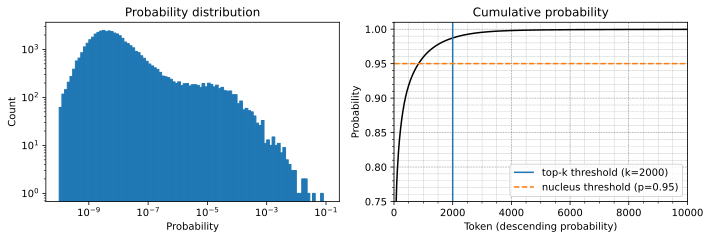

In [46]:
# Gráfico 1: Distribuição das probabilidades do próximo token
# Gráfico 2: Quantidade de Tokens com Maior Probabilidade x Probabilidade Acummulada

import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(10, 3.5))

axes[0].hist(probs[0], bins=np.logspace(-10, -1, 100), color="C0", edgecolor="C0")
axes[0].set_xscale("log")
axes[0].set_yscale("log")
axes[0].set_title("Probability distribution")
axes[0].set_xlabel("Probability")
axes[0].set_ylabel("Count")
#axes[0].grid(which="major")

axes[1].plot(np.cumsum(np.sort(probs[0])[::-1]), color="black")
axes[1].set_xlim([0, 10000])
axes[1].set_ylim([0.75, 1.01])
axes[1].set_title("Cumulative probability")
axes[1].set_ylabel("Probability")
axes[1].set_xlabel("Token (descending probability)")
#axes[1].grid(which="major")
axes[1].minorticks_on()
#axes[1].grid(which='minor', linewidth='0.5')
top_k_label = 'top-k threshold (k=2000)'
top_p_label = 'nucleus threshold (p=0.95)'
axes[1].vlines(x=2000, ymin=0, ymax=2, color='C0', label=top_k_label)
axes[1].hlines(y=0.95, xmin=0, xmax=10000, color='C1', label=top_p_label, linestyle='--')
axes[1].legend(loc='lower right')
axes[1].grid(color='#7F7F7F', ls = '--', lw = 0.25, which='minor')
axes[1].grid(color='#7F7F7F', ls = '--', lw = 0.50, which='major')
plt.tight_layout()

### Top-k

**Objetivo:** evitar *tokens* de baixa probabilidade selecionando apenas o k *tokens* com maior probabilidade a cada *token* gerado (linha contínua azul no gráfico).

In [109]:
torch.manual_seed(42);

In [110]:
# usa o parâmetro top_k para restringir cada escolha
# aos 50 tokens de maior probabilidade
output_topk = model.generate(
    input_ids,
    max_length=max_length,
    do_sample=True, 
    top_k=50)
print(tokenizer.decode(output_topk[0]))

In a shocking finding, scientist discovered
a herd of unicorns living in a remote, previously unexplored
valley, in the Andes Mountains. Even more surprising to the
researchers was the fact that the unicorns spoke perfect English.


"They could walk, talk and generally behave like wild, intelligent species like
horses and

donkeys. The herd is the most complete wild herd yet found in the Andes. They
had been there

for as far back as four million years, before they had even experienced the
onset of human civilization," the

Dr. Marco Guimaraes,


**Conclusão:** este é o melhor texto até agora

**Obs.:**
1. O valor do k é fixo para todos *tokens* da sequência, o que pode ser ruim dependendendo da distribuição das probabilidades.
2. O k pode ser escolhido **empiricamente** com base em alguma métrica de qualidade (algo a ser visto num capítulo posterior).

### Top-p

**Objetivo:** evitar *tokens* de baixa probabilidade selecionando apenas o k *tokens* de maior probabilidade que representam a probabilidade p. (linha tracejada laranja no gráfico)

In [111]:
# hide
torch.manual_seed(42);

In [112]:
output_topp = model.generate(
    input_ids,
    max_length=max_length,
    do_sample=True,
    top_p=0.90)
print(tokenizer.decode(output_topp[0]))

In a shocking finding, scientist discovered
a herd of unicorns living in a remote, previously unexplored
valley, in the Andes Mountains. Even more surprising to the
researchers was the fact that the unicorns spoke perfect English.


"They could walk, talk and tell stories, they are the closest animal relatives
of

man. The research team found the herd of wild unicorns and its wild relatives

are completely isolated from other animals and appear to have developed a

highly sophisticated way of interacting with each other," Dr. Mariana Pascual-

Muriel, who


**Conclusão:**

Também gerou um bom texto.

## Which Decoding Method Is Best?

## Conclusion